# Symboltabellen

In diesem Notebook schauen wir uns Symboltabellen an. Wir diskutieren verschiedene Implementationen mit unterschiedlichen, zugrunde liegenden Datenstrukturen. Wir werden uns im folgende 3 verschiedene Implementationen besprechen:

1. Implementation mit verketteter Liste
2. Implementation mittel geordnetem Array
3. Implementation mittels binären Suchbäumen. 

Die wichtigste Operation in Symboltabellen ist das Suchen von zu einem zu einem Schlüssel dazugehörenden Wert. Diese Operation liefert den Wert in der Symboltabelle zuück, der unter dem Schlüssel in der Symboltabelle gespeichert ist, der *gleich* dem Anfrageschlüssel ist. Die *Gleichheit* von Schlüsseln spielt hier also eine wichtige Rolle. Deshalb werden wir uns, bevor wir zu den Implementationen kommen, zuerst Objektgleichheit in Python genauer anschauen. 

## Objektgleichheit

Intuitiv ist uns klar, was es bedeutet, dass zwei Objekte gleich sind. Zum Beispiel wissen wir, dass wenn

In [4]:
s1 = "Hallo"
s2 = "Hallo"

dann sollte auch s1 und s2 gleich sein. Also möchten wir, dass folgender Ausdruck ```true``` ergibt:

In [5]:
s1 == s2

True

Für die von Python vordefinierten Typen wie Strings, Int, Float, etc. stimmt dies auch tatsächlich. Wenn wir aber unsere eigenen Typen definieren, wird die Sache etwas schwieriger. Wir veranschaulichen dies am Beispiel der Klasse Datum, die wie folgt definieren:

In [6]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year

Jetzt beobachten wir, was passiert, wenn wir zwei Objekte vom Typ Datum vergleichen:

In [7]:
d1 = Date(1, 1, 2018)
d2 = Date(1, 1, 2018)
d1 == d2

False

Wir sehen, dass die Objekte ```d1``` und ```d2``` von Python als ungleich erachtet werden. Der Grund ist, dass per default die Gleichheit nur auf Objektidentitäten definiert ist. Das bedeutet, es wird nur verglichen ob es sich um das gleiche Objekt handelt, aber nicht ob der Inhalt gleich ist. Wenn wir Objekte als Schlüssel für Symboltabellen verwenden wollen, reicht diese Definition von Gleichheit nicht aus.

Damit wir auch für benutzerdefinierte Typen, richtige Objektgleichheit haben, müssen wir die Methode ```__eq__``` implementieren. Diese Methode muss eine Äquivalenzrelation definieren, also folgende Anforderungen erfüllen:

* Reflexivität: $x == x$ ist wahr
* Symmetrie: $x == y$ genau dann wenn $y == x$
* Transitivät: $x ==y $ und $y == z$ dann $x == z$

In der Praxis ist die Implementation der Methode ```__eq__``` meist sehr einfach, da wir diese direkt über die Felder der Klasse definieren können. 

In [8]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
        
    def __eq__(self, rhs):
        return self.day == rhs.day \
            and self.month == rhs.month \
            and self.year == rhs.year

Wenn wir jetzt nochmals zwei Objekte vom Typ ```Date``` definieren, sollte alles richtig funktionieren:

In [9]:
d1 = Date(1, 1, 2018)
d2 = Date(1, 1, 2018)
d3 = Date (2, 2, 2018)
print("d1==d2: ", d1 == d2)
print("d1==d3: ", d1 == d3)
print("d1!=d3: ", d1 != d3)


d1==d2:  True
d1==d3:  False
d1!=d3:  True


### Ordnungsrelationen

Manchmal wollen wir nicht nur feststellen können, ob zwei Objekte gleich sind, sondern diese auch Ordnen können. Wie bei Gleichheit von Objekten kümmert sich Python / Java um die Ordnung von den vordefinierten Typen.

In [10]:
"AA" < "AB"

True

In [11]:
"AB" > "AA"

True

Für benutzerdefinierte Typen, die ja nicht immer eine Ordnung haben, sind diese Operationen nicht definiert. 

In [12]:
d1 = Date(1, 1, 1970)
d2 = Date(1, 1, 2018)
d1 > d2

TypeError: '>' not supported between instances of 'Date' and 'Date'

Um diese Operation zu unterstützen, müssen wir die Python Methode ```__lt__``` implementieren und die Klasse mittels einer Annotation als geordnet kennzeichnen. 

*(Alternativ können wir auch alle funktionen ```__lt__```, ```__le__```, ```__gt__``` und ```__ge__``` implementieren)*

In [13]:
from functools import total_ordering

@total_ordering
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
        
    def __eq__(self, rhs):
        return self.day == rhs.day \
            and self.month == rhs.month \
            and self.year == rhs.year
    def __lt__(self, rhs):
        return self.year < rhs.year \
            or (self.year == rhs.year and self.month < rhs.month) \
            or (self.year == rhs.year and self.month == rhs.month) \
            and self.day < rhs.day

In [14]:
d1 = Date(1, 1, 1970)
d2 = Date(1, 1, 2018)
d1 < d2

True

In [15]:
d1 >= d1

True

## Implementation 1: Symboltabelle mittels verketteter Liste

Wir kommen nun zur ersten einfachen Implementation einer Symboltabelle. Diese Implementation sollte in der Praxis nie verwendet werden und dient nur dazu, den ADT Symboltabelle auf möglichst einfache Weise umzusetzen, so dass wir erste Testclients schreiben können.



Die Implementation basiert auf einer Verketteten Liste. In den Knoten (Klasse ```Node```) speichern wir sowohl den Schlüssel als auch den zugehörigen Wert. 

Die ```put``` Operation stellt fest, ob der Schlüssel bereits in der Liste vorhanden ist. Falls nicht wird er am Anfang eingefügt. Falls der Schlüssel bereits vorhanden ist, wird der Wert überschrieben. 

Bei der ```get``` Methode wird der zum Schlüssel gehörende Wert in der Liste gesucht und, falls dieser gefunden wird, zurückgegeben. Die Hauptarbeit wird hier von der Hilfsmethode ```_findNodeWithKey``` übernommen, die den Knoten mit dem entsprechenden Schlüssel zurückgibt (oder ```None``` falls kein entsprechender Eintrag gefunden wurde). Dieselbe Methode wird auch beim ```delete``` verwendet. Hier wird einfach der entsprechende Knoten gesucht und, wenn dieser gefunden wurde, aus der Liste entfernt. 

Die Methode ```keys``` gibt einen Iterator zurück, mit welchem wir über alle Schlüssel iterieren können. 


In [16]:
class SequentialSearchST:
    
    class Node:
        def __init__(self, key, value, next = None):
            self.key = key
            self.value = value
            self.next = next;
    
    
    def __init__(self):
        self._first = None
        self._numberOfNodesInList = 0
    
    
    def put(self, key, value):
        if self._first == None:
            self._first = SequentialSearchST.Node(key, value)
            self._numberOfNodesInList += 1
        else:
            nodeWithKey = self._findNodeWithKey(key)
            if nodeWithKey == None:
                self._first = SequentialSearchST.Node(key, value, self._first)
                self._numberOfNodesInList += 1
            else:
                nodeWithKey.value = value
    
    def get(self, key):
        nodeWithKey = self._findNodeWithKey(key)
        if nodeWithKey == None:
            return None
        else:
            return nodeWithKey.value
    
    def delete(self, key):
        if self._first == None:
            return
        if (self._first.key == key):
            self._numberOfNodesInList = 0
            self._first = self._first.next
            return
            
        current = self._first
        while (current.next != None):
            if current.next.key == key:
                current.next = current.next.next
                self._numberOfNodesInList -= 1    
                
            current = current.next
        
    
    def contains(self, key):
        return self._findNodeWithKey(key) != None
    
    def isEmpty(self):
        return self.size() == 0
    
    def size(self):
        return self._numberOfNodesInList
    
    def _findNodeWithKey(self, key):
        current = self._first
        while (current != None):
            if current.key == key:
                return current
            current = current.next
        
        return None # not found
    
    def keys(self):
        if (self._first == None):
            yield current.key
        current = self._first
        while (current != None):
            yield current.key
            current = current.next

### Clients

Im folgenden zeigeln wir die Nutzung von einer Symboltabelle an zwei einfachen Beispielen:

#### Testclient

Unser erster Client nimmt jeden Buchstaben von einem String als Key und die Position des Buchstabens im String als Wert.

In [17]:
string = "SEARCHEXAMPLE"
st = SequentialSearchST()
for (pos, char) in enumerate(string):
    st.put(char, pos)

Um alle Objekte auszugeben, gehen wir durch alle Schlüssel und geben die dazugehörigen Werte aus:

In [18]:
for k in st.keys():
    print("key: " +str(k) + " Wert: " +str(st.get(k)))

key: L Wert: 11
key: P Wert: 10
key: M Wert: 9
key: X Wert: 7
key: H Wert: 5
key: C Wert: 4
key: R Wert: 3
key: A Wert: 8
key: E Wert: 12
key: S Wert: 0


##### Übung:

* Ersetzen Sie einen bereits vorhandenen Schlüssel mit der Methode ```put```. Was passiert?

#### Frequency Client

Unser zweiter Client zeigt eine eine erste sinnvolle Anwendung von Symboltabellen. Er zählt, wie oft ein bestimmes Wort in einem Text vorkommt.

Als erstes bereiten wir einen Text auf. Wir nutzen den folgenden Ausschnitt aus "Alice's Adventures in Wonderland". Damit wir nicht durch die Satzzeichen gestört werden, entfernen wir diese zuerst. 

In [19]:
testdataRaw = """ Alice was beginning to get very tired of 
sitting by her sister on the bank, and of having nothing to 
do:  once or twice she had peeped into the book her sister 
was reading, but it had no pictures or conversations in it, `and what is the use of a book,'
thought Alice `without pictures or conversation?'

  So she was considering in her own mind (as well as she could,
for the hot day made her feel very sleepy and stupid), whether
the pleasure of making a daisy-chain would be worth the trouble
of getting up and picking the daisies, when suddenly a White
Rabbit with pink eyes ran close by her.

  There was nothing so VERY remarkable in that; nor did Alice
think it so VERY much out of the way to hear the Rabbit say to
itself, `Oh dear!  Oh dear!  I shall be late!'  (when she thought
it over afterwards, it occurred to her that she ought to have
wondered at this, but at the time it all seemed quite natural);
but when the Rabbit actually TOOK A WATCH OUT OF ITS WAISTCOAT-
POCKET, and looked at it, and then hurried on, Alice started to
her feet, for it flashed across her mind that she had never
before seen a rabbit with either a waistcoat-pocket, or a watch to
take out of it, and burning with curiosity, she ran across the
field after it, and fortunately was just in time to see it pop
down a large rabbit-hole under the hedge.
"""
import string
translator = str.maketrans('', '', string.punctuation)
testdata = testdataRaw.translate(translator).lower()

##### Übung: 

* Was macht die Python Methode translate? Explorieren Sie.


Nun iterieren wir durch alle Wörter und nutzen das Wort jeweils als Schlüssel. Für jeden Schlüssel speichern wir dann, wie oft wir diesen Schlüssel (also das Wort) bereits im Text gesehen haben. 

In [20]:
st = SequentialSearchST()
for word in testdata.split():
    if len(word) > 5:
        if st.contains(word):
            st.put(word, st.get(word) + 1)
        else:
            st.put(word, 1)

Wir können nun das Wort, welches am meisten vorkommt, ganz einfach auslesen. Beachten Sie, dass wir uns dazu eine Variable max führen, die immer auf das wort mit den meisten Einträgen zeigt. Am Anfang wird dies auf ein nicht existierendes Wort, mit 0 Einträgen gesetzt.

In [21]:
max = ""
st.put("", 0)
for word in st.keys():
    if st.get(word) > st.get(max):
        max = word
print(max, st.get(max))

rabbit 4


#### Übung:
* Geben Sie alle im Text vorkommende Wörter, zusammen mit deren Häufigkeit aus

## Implementation 2: Geordnete Arrays

In unserer zweiten Implementation nutzen wir eine binäre Suche. Die binäre Suche ist eine effiziente Methode um festzustellen, ob ein gegebner Schlüssel in einem geordneten Array vorkommt. Dabei wird der Schlüssel zuerst mit dem mittleren Element im Array verglichen. Falls der Schlüssel dem mittleren Element entspricht, wird die entsprechende position im Array zurückgegeben. Ansonsten wird die Suche auf die selbe Weise im unteren oder oberen Teilarray fortgesetzt. 

In [22]:
def binarySearch(a , key ):
    lo = 0
    hi = len(a) - 1
    while lo  <= hi:
        mid = (lo + hi) // 2        
        if  a[mid] < key:
            lo = mid + 1
        elif  key  < a[mid]:
            hi = mid - 1
        else:
            return mid
    return None

Bei einer erfolgreichen wird also der Index auf das gefundene Element zurückgegeben:

In [24]:
binarySearch([1, 2, 3, 4, 7, 11, 12, 17, 29, 33, 35], 33)

9

Falls das Element nicht vorhanden ist, wird hier ```None``` zurückgegeben.

In [25]:
binarySearch([1, 3, 7, 11, 19], 18)

#### Übung:
* Experimentieren Sie mit Binary search. Geben sie ```lo```, ```mid``` und ```hi``` aus um zu verstehen wie die Suche vor sich geht. 

Eine ähnliche Funktion, genannt ```rank```, bildet das Rückgrat unserer nächsten Implementation. Die Implementation von ```rank``` entspricht genau der binären Suche. Der einzige Unterschied ist, dass bei einer erfolglosen Suche ```lo``` statt ```None``` zurückgegeben wird. Dies hat den Effekt, dass der Rückgabewert immer genau der anzahl Elemente entspricht, die kleiner als der gesuchte Schlüssel sind.

In [88]:
def rank(a , key ):
    lo = 0
    hi = len(a) - 1
    while lo  <= hi:
        mid = (lo + hi) // 2        
        if  a[mid] < key:
            lo = mid + 1
        elif  key  < a[mid]:
            hi = mid - 1
        else:
            return mid
    return lo

#### Übung:

* Machen Sie eine erfolgreiche und erfolglose Suchanfrage und vergewissern Sie sich, dass der Rückgabewert genau der Anzahl Elementen entspricht, die kleiner als der gesuchte Schlüssel sind. 
* Argumentieren Sie, weshalb alle Schlüssel, die am Ende im Teilarray ```a[0:lo]``` sind kleiner oder gleich dem gesuchten Schlüssel sein müssen. 

Dank der rank Methode ist nun die Implementation der Symboltabelle einfach. Die Idee ist, dass wir die Elemente in einem sortieren Array speichern. In der Implementation der Methoden ```get```, ```delete```, und ```put``` können wir damit effizient auf die richtige Stelle springen. 

In [93]:
class BinarySearchST:
    
    def __init__(self):
        self._keys = []
        self._values = []
    
    
    def _rank(self, value):
        lo = 0
        hi = len(self._keys) - 1
        while lo  <= hi:
            mid = (lo + hi) // 2
            if  self._keys[mid] < value:
                lo = mid + 1
            elif  value  < self._keys[mid]:
                hi = mid - 1
            else:
                return mid
        return lo
    
    def get(self, key):
        if self.isEmpty():
            return None
        
        rank = self._rank(key)
        if rank < len(self._keys) and self._keys[rank] == key:
            return self._values[rank]
        else:
            return None
        
    def put(self, key, value):
        rank = self._rank(key)
        if rank < len(self._keys) and self._keys[rank] == key:
            self._values[rank] = value
        else:
            self._keys.insert(rank, key)
            self._values.insert(rank, value)
             
    def delete(self, key):
        rank = self._rank(key)
        if rank < len(self._keys) and self._keys[rank] == key:
            del self._keys[rank] 
            del self._values[rank]
            
    
    def contains(self, key):
        rank = self._rank(key)
        return rank < len(self._keys) and self._keys[rank] == key
    
    def isEmpty(self):
        return self.size() == 0
    
    def size(self):
        return len(self._keys)
    
    def keys(self):
        return self._keys

#### Übung:
* Schauen Sie sich die Implementation genau an. Wie wird ```rank``` verwendet? Was muss jeweils zusätzlich noch gemacht werden?
* Falls Sie bei einer der Funktionen unsicher sind, instrumentieren Sie den Code durch ```print``` statements und testen Sie die Symboltabelle mit einfachen Beispielen. 



## Implementation 3: Binäre Suchbäume

## Repräsentation

Wir definieren uns einen Binären Suchbaum als Klasse BST. Die Klasse arbeitet intern mit einer Repräsentation Node, welche die Knoten vom Baum repräsentiert. Der leere Baum wird durch das Symbol ```None``` definiert. 
Die grundlegenden Operationen einer Symboltabelle, ```size```, ```isEmpty```, ```put```, ```get```, ```contains```, ```keys``` sind einfach zu definieren.

Um die Grösse effizient zu berechnen, speichern wir uns einen Knotenzähler
```count```, welcher die Anzahl Knoten im jeweiligen Unterbaum speichert.

In [29]:
class BST:
    
    class Node:
        def __init__(self, key, value, count = 1):
            self.key = key
            self.value = value
            self.count = count
            self.left = None
            self.right = None
    
    def __init__(self):
        self._root = None
    
    def root(self):
        return self._root
    
    def size(self):
        return self._size(self._root)
    
    def _size(self, root):
        if (root == None):
            return 0
        else:
            return root.count
    
    def isEmpty(self):
        return self.size() == 0
    
    def contains(self, key):
        return self.get != None
    
    def get(self, key): 
        return self._get(key, self._root)
    
    def _get(self, key, node):
        if node == None:
            return None
        elif key < node.key:
            return self._get(key, node.left)
        elif key > node.key:
            return self._get(key, node.right)
        elif key == node.key:
            return node.value
        else:
            raise Exception("should never reach this line")
            
    def put(self, key, value):
        self._root = self._put(key, value, self._root)
    
    def _put(self, key, value, node):
        if (node == None):
            return BST.Node(key, value, 1)
        elif key < node.key:
            node.left = self._put(key, value, node.left)
        elif key > node.key:
            node.right = self._put(key, value, node.right)
        elif key == node.key:
            node.value = value
        node.count = 1 + self._size(node.left) + self._size(node.right)
        return node
        
    def keys(self):
        return self._keys(self._root, [])
        
    def _keys(self, node, keylist):        
        if node == None:
            return keylist
        else:
            self._keys(node.left, keylist)
            keylist.append(node.key)
            self._keys(node.right, keylist)
            return keylist
        
    def height(self):
        return self._height(self._root)
    
    def _height(self, node):
        if node == None:
            return -1
        else:
            return 1 + max(self._height(node.left), self._height(node.right))        

##### Übung:
* Schauen Sie sich die Methoden ```get``` und ```put``` genau an und stellen Sie sicher, dass Sie diese verstehen. 
    * Beachten Sie insbesondere wie beim put nach dem Einfügen jeweils wieder die Links richtig gesetzt werd und wie das Feld ```count``` aktualisiert wird. 
    * Falls Ihnen etwas unklar ist, instrumentieren Sie den Code mit ```print``` statements und testen Sie die Methoden an einfachen Beispielen. 
* Schauen Sie sich die Methode ```keys``` an. Welche Traversierungsstrategie (inorder, postorder, preorder) wird hier gewählt? Weshalb?

### Experimente mit Binärsuchbäumen

Um die Funktionsweise von Binären Bäumen besser verstehen zu können ist es hilfreich, diese zu visualisieren. 
Dazu definieren wir uns folgende visualisierungsfunktion. Sie müssen die Details davon nicht verstehen. 

*Achtung: Beachten Sie, dass wir hier die leeren Teilbäume (als Schwarze Punkte) mitvisualisieren.*

In [26]:
from graphviz import Graph

def plotTree(tree):
    dot = Graph(comment='Tree')
    _plotTree(tree.root(), dot)
    display(dot)

def nodeToString(node):
    return str(node.key) +":" +str(node.value)
    
def _plotTree(node, dot):
    
    if node == None:        
        return 
    dot.node(str(node), nodeToString(node))
    if node.left != None:
        dot.node(str(node.left), nodeToString(node.left))
        dot.edge(str(node), str(node.left))
    else:
        dot.node(str(node) + "left-none", "",  **{'shape':'point'})
        dot.edge(str(node), str(node) + "left-none")
        
    if node.right != None:
        dot.node(str(node.right), nodeToString(node.right))
        dot.edge(str(node), str(node.right))
    else:
        dot.node(str(node) + "left-right", "",  **{'shape':'point'})
        dot.edge(str(node), str(node) + "left-right")

    _plotTree(node.left, dot)
    _plotTree(node.right, dot)
    

Nun können wir visualisieren, was passiert, wenn wir Schlüssel in einen Binärsuchbaum einfügen. Folgender Code gibt jeweils nach dem Einfügen den entstandenen Baum aus. 

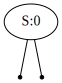

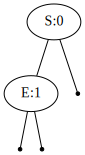

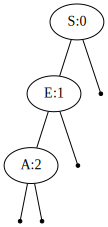

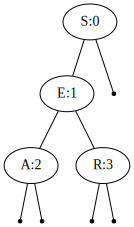

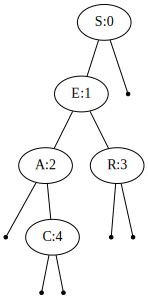

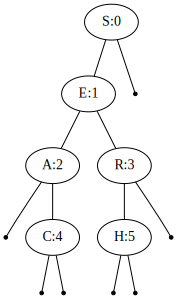

In [30]:
string = "SEARCH"
bst = BST()
for (pos, char) in enumerate(string):
    bst.put(char, pos)
    plotTree(bst)



#### Übung

Nun sind wir bereit erste Experiment mit dem Baum durchzuführen. 

Probieren Sie folgendes aus:
* Was passiert, wenn Sie einen Schlüssel (mit unterschiedlichen Werten) zweimal einfügen?
* Was passiert wenn Sie eine bereits sortiere Liste einfügen?
* Können Sie einen perfekten Baum der Höhe 2 kreieren?
* Erstellen Sie zufällige Sequenzen und schauen Sie wie hoch der Baum im Schnitt wird
* Schreiben Sie einen Sortieralgorithmus, welcher den binären Baum nutzt (Hinweis, verwenden Sie die Methode ```keys```)

 ### Ordnungsbasierte Operationen

Als nächsten zeigen wir einfache Implementation der Ordnungsbasierten Operationen, insbesondere ```min```, ```floor```, ```rank```, und ```select```. Um diese Methoden zu verstehen, visualisiert man am besten nochmals den Baum, und überlegt sich anhand der Datenstruktur, wie man diese implementieren sollte. Der Code folgt bei allen Methoden genau der Datenstruktur. 

*Anmerkung: Diese Klasse ```BSTWithOrderedOps``` erbt von der Klasse BST. Dies wurde hier so gemacht, damit wir die Implementation in zwei Teile aufteilen und separat diskutieren können. In der Praxis würde man diese Methoden natürlich alle in derselben Klasse implementieren.*

In [142]:
class BSTWithOrderedOps(BST):
    def min(self):
        return self._min(self._root).key
    
    def _min(self, node):
        if node.left == None:
            return node
        else:
            return self._min(node.left)
    
    def floor(self, key):
        return self._floor(self._root, key).key
    
    def _floor(self, node, key):
        if node == None:
            return None;
        
        if key == node.key:
            return node
        elif key <  node.key:
            return self._floor(node.left, key)
        else:
            t = self._floor(node.right, key)
            if t != None:
                return t
            else: 
                return node
            
    def select(self, k):
        return self._select(self._root, k).key

    def _select(self, node, k):
        if node == None:
            return None
        t = self._size(node.left);
        if t > k: 
            return self._select(node.left,  k)
        elif t < k:
            return self._select(node.right, k - t - 1)
        else:
            return node;
        
    def rank(self, key):
        return self._rank(self._root, key)
    
    def _rank(self, node, key):
        if node == None:
            return 0
    
        if key < node.key: 
            return self._rank(node.left, key)
        elif key > node.key:
            return 1 + self._size(node.left) + self._rank(node.right, key)
        else:
            return self._size(node.left)

Die Klasse benutzt man genau wie die Klasse ```BST```. Nur diesmal können wir auch auf die ordnungsbasierten Operationen zugreifen:

In [143]:
bst = BSTWithOrderedOps()
for key in list("MATHEMATICSANDCOMPUTERSCIENCE"):
    bst.put(key, "value")

In [150]:
print("min: ", bst.min())
print("floor(G): "+ bst.floor("G"))
print("rank(S): " + str(bst.rank("S")))
print("select(7): " + bst.select(11))


min:  A
floor(G): E
rank(S): 11
select(7): S


#### Übung

* Experimentieren Sie mit den Methoden, bis Sie genau verstehen, was diese machen.
    * Testen Sie verschiedene Fälle aus (Schlüssel vorhanden, nicht vorhanden, ...)
* Was macht die Methode select? Welche Eigenschaft der Bäume wird für die Implementation ausgenutzt?
* Fügen Sie print statements in den Code ein, damit Sie die Entscheidungen (also ob man in den linken oder rechten Teilbaum geht), nachvollziehen können und testen Sie die Methoden mit einfachen Inputdaten. 

### Löschen von Knoten

Als letztes zeigen wir noch eine Implementation der Löschoperationen nach Hibbard.
Der Code ist etwas trickreich. Zum Verständnis sollte man sich nochmals die drei Spezialfälle in Erinnerung rufen, die in den Folien besprochen wurden. Ein weitere Schlüssel zum Verständnis ist zu beachten, dass die Verweise auf den linken und rechten Teilbaum jeweils auf dem "Rückweg" neu gesetzt werden (analog der ```put``` Methode). Um ein Blatt zu löschen genügt es also, beim entsprechenden Node ```None``` zurückzugeben. 

In [156]:
class BSTWithDelete(BSTWithOrderedOps):
    
    def deleteMin(self):
        self._deleteMin(self._root)

    def _deleteMin(self, node): 
        if node.left == None:
            return node.right;
        node.left = self._deleteMin(node.left);
        node.size = self._size(node.left) + self._size(node.right) + 1;
        return node;
    

    
    def delete(self, key):
        self._root = self._delete(self._root, key)
    
    def _delete(self, node, key):
        if node == None:
            return None;
        
        if  key < node.key: 
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key);
        else: # key == node.key (zu löschender Knoten)
            if node.right == None:
                return node.left
            if node.left == None:
                return node.right            
            t = node;
            node = self._min(t.right)
            node.right = self._deleteMin(t.right)
            node.left = t.left
            
        node.size = self._size(node.left) + self._size(node.right) + 1;
        return node

Der folgende Code illustriert, wie sich der Baum ändert, wenn wir einen Knoten löschen, welcher zwei Kinder hat. 

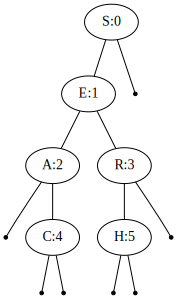

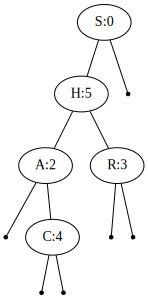

In [197]:
import random
bst = BSTWithDelete()
for (num,key) in enumerate("SEARCH"):
    bst.put(key, num)
plotTree(bst)

bst.delete("E")
plotTree(bst)

#### Übung
* Probieren Sie verschiedenen Spezialfälle aus und versuchen Sie nachzuvollziehen, wie der Algorithmus funktioniert, indem Sie print Statements in den Code einfügen. 